The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

## 1. Problem Statement


find the relations between the sales and the features

## 2. Hypothesis Generation


 sales of each product in a particular store → this is what we want to predict , 
 a particular product selling rate in all 10 stores, maybe the products are not available in all 10 stores , it may be in 5 or 7 etc
outlet sales
we need to find the elling rate for each product
we want to know the reason that affects the sales
the location is not unknown of the highest store rate


#### the location of the store affects the sales
#### the type of the product affect the sales
#### the type of the store affects the sales 

## 3. Loading Packages and Data

### loading packages

In [621]:
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint, uniform

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import power_transform
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer



#modeling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import cross_val_score

#evaluation
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score

#saving model
import joblib

from hyperopt import hp

### loading data

In [555]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")


## Data Structure and Content

In [556]:
train_df.head()  

# MRP (Maximum Retail Price)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [557]:
#numerical data
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [558]:
#fixing data types 
str_cols=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
num_cols=train_df.select_dtypes(include=["int","float"]).columns.tolist()
num_cols.pop() #remove the target column

for col in str_cols:
    train_df[col]=train_df[col].astype('string')
    
    
train_df.info()    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   string 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   string 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   string 
 9   Outlet_Location_Type       8523 non-null   string 
 10  Outlet_Type                8523 non-null   string 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(2), string(5)
memory usage: 799.2+ KB


In [559]:
#categorical data
train_df.describe(include="string")

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,6113,8523,8523
unique,5,16,3,3,4
top,Low Fat,Fruits and Vegetables,Medium,Tier 3,Supermarket Type1
freq,5089,1232,2793,3350,5577


In [560]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   string 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   string 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   string 
 9   Outlet_Location_Type       8523 non-null   string 
 10  Outlet_Type                8523 non-null   string 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(2), string(5)
memory usage: 799.2+ KB


In [561]:
missing_data=(train_df.isna().sum()/len(train_df))*100
missing_data

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [562]:
#checking duplicates
train_df.duplicated().sum()

0

In [563]:
train_df[['Outlet_Type', 'Outlet_Location_Type', 'Outlet_Size']].value_counts(dropna=False).to_frame().sort_index()

0
Outlet_Type       Outlet_Location_Type Outlet_Size      
Grocery Store     Tier 1               Small         528
                  Tier 3               <NA>          555
Supermarket Type1 Tier 1               Medium        930
                                       Small         930
                  Tier 2               Small         930
                                       <NA>         1855
                  Tier 3               High          932
Supermarket Type2 Tier 3               Medium        928
Supermarket Type3 Tier 3               Medium        935

## Exploratory Data Analysis

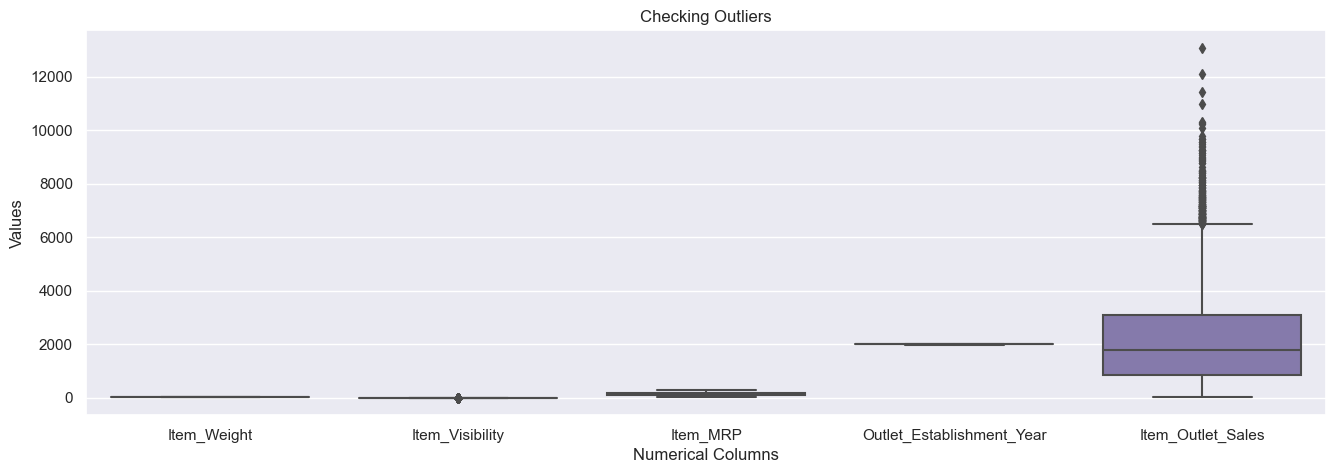

In [564]:
#box plot
#heat correlation map

sns.set(style="darkgrid")

#chekcing outliers
plt.figure(figsize=(16, 5))  # Set the size of the figure

sns.boxplot(data=train_df)  # Create the box plot

plt.title("Checking Outliers")  # Set the title of the plot
plt.xlabel("Numerical Columns")  # Set the label for the x-axis
plt.ylabel("Values")  # Set the label for the y-axis

plt.show()  # Display the plot


<Axes: >

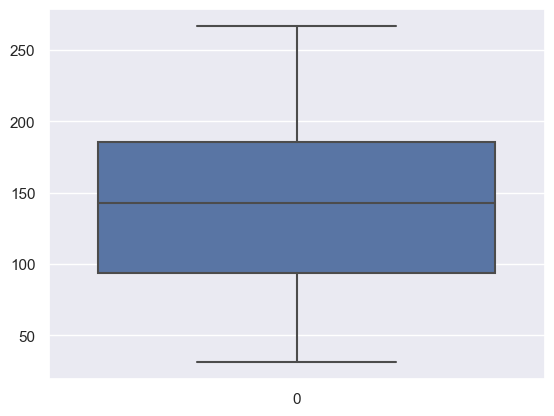

In [565]:
sns.boxplot(data=train_df["Item_MRP"])

<Axes: >

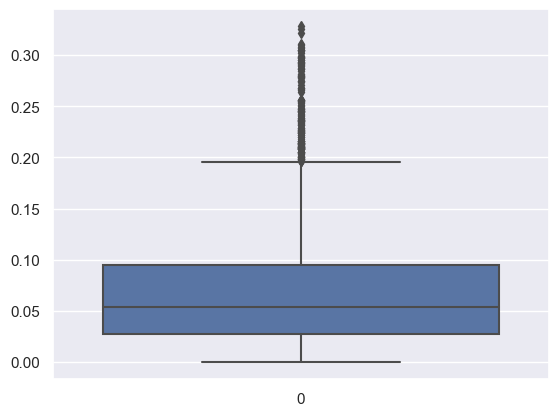

In [566]:
sns.boxplot(data=train_df["Item_Visibility"])

## Univariate Analysis

### Value Counts For Categorical Datatypes

In [567]:
for col in str_cols:
    print(f"{col} Value Count :")
    print(train_df[col].value_counts(normalize=True).round(2))
    print("---------------------------")

Item_Fat_Content Value Count :
Low Fat     0.6
Regular    0.34
LF         0.04
reg        0.01
low fat    0.01
Name: Item_Fat_Content, dtype: Float64
---------------------------
Item_Type Value Count :
Fruits and Vegetables    0.14
Snack Foods              0.14
Household                0.11
Frozen Foods              0.1
Dairy                    0.08
Canned                   0.08
Baking Goods             0.08
Health and Hygiene       0.06
Soft Drinks              0.05
Meat                     0.05
Breads                   0.03
Hard Drinks              0.03
Others                   0.02
Starchy Foods            0.02
Breakfast                0.01
Seafood                  0.01
Name: Item_Type, dtype: Float64
---------------------------
Outlet_Size Value Count :
Medium    0.46
Small     0.39
High      0.15
Name: Outlet_Size, dtype: Float64
---------------------------
Outlet_Location_Type Value Count :
Tier 3    0.39
Tier 2    0.33
Tier 1    0.28
Name: Outlet_Location_Type, dtype: Float64
--

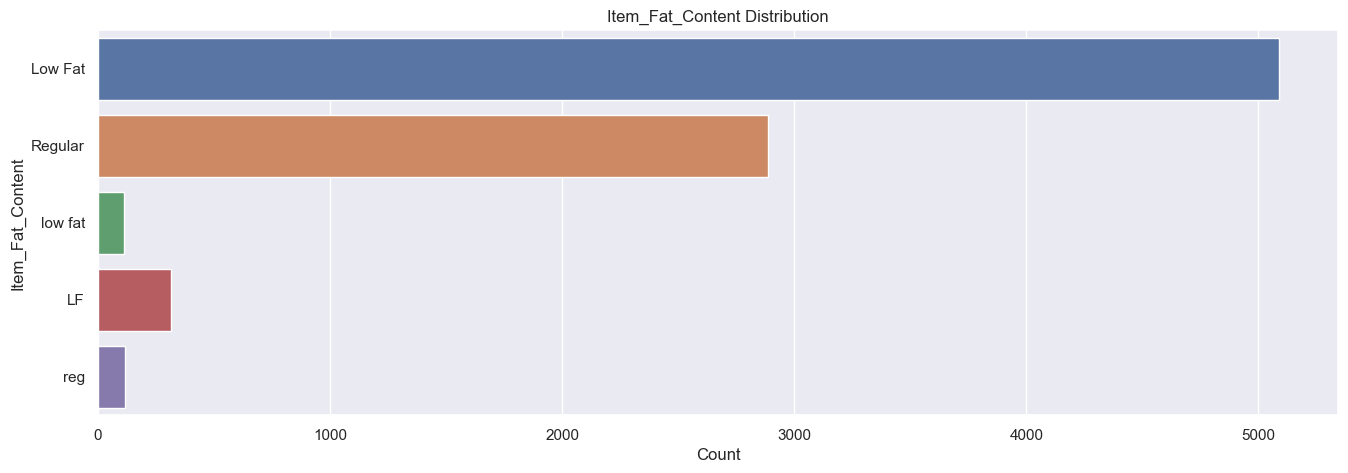

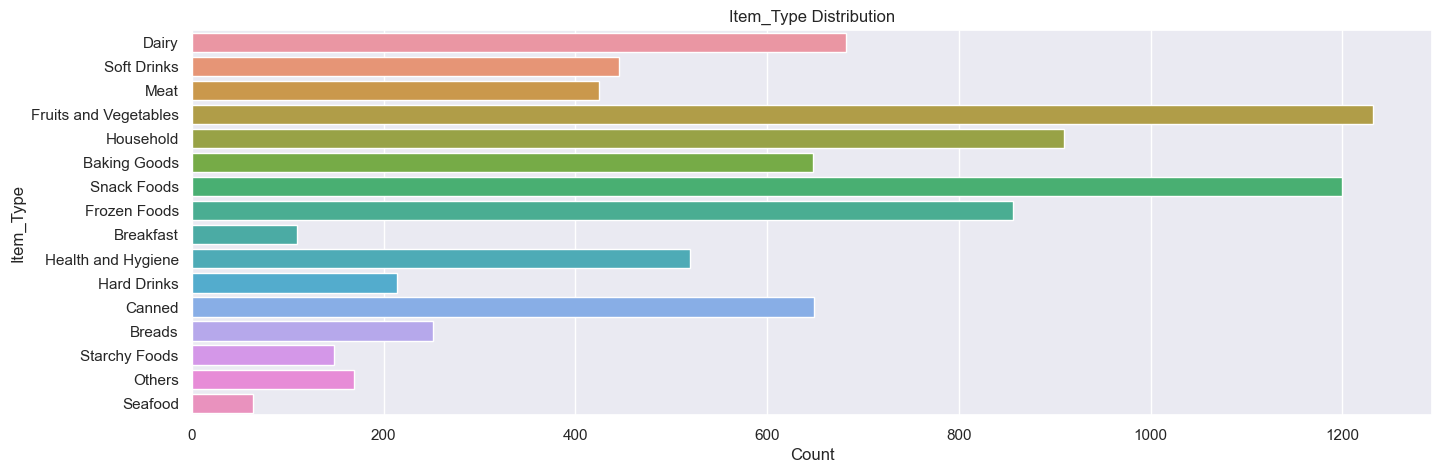

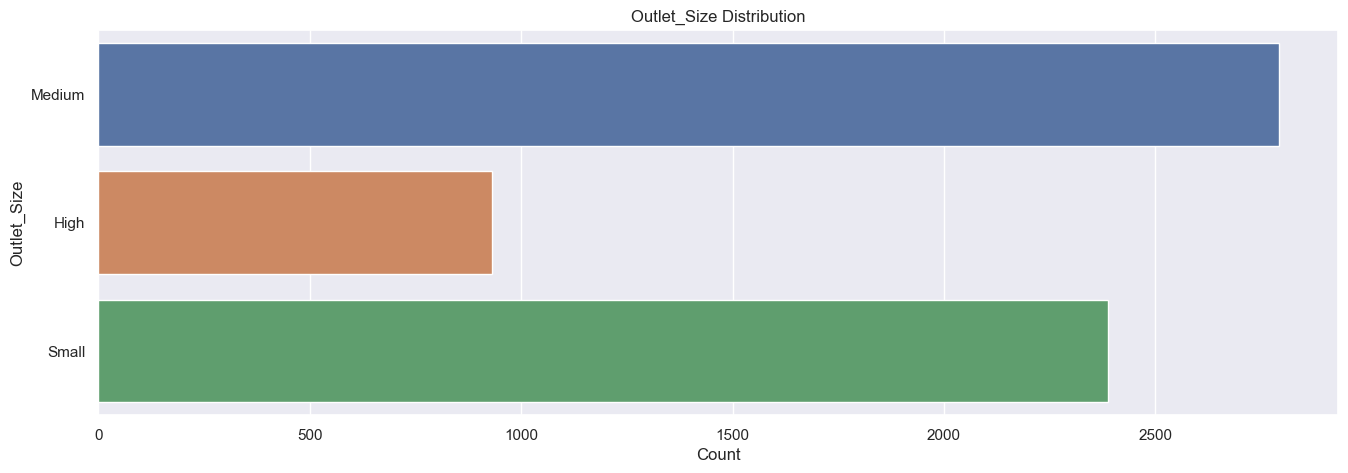

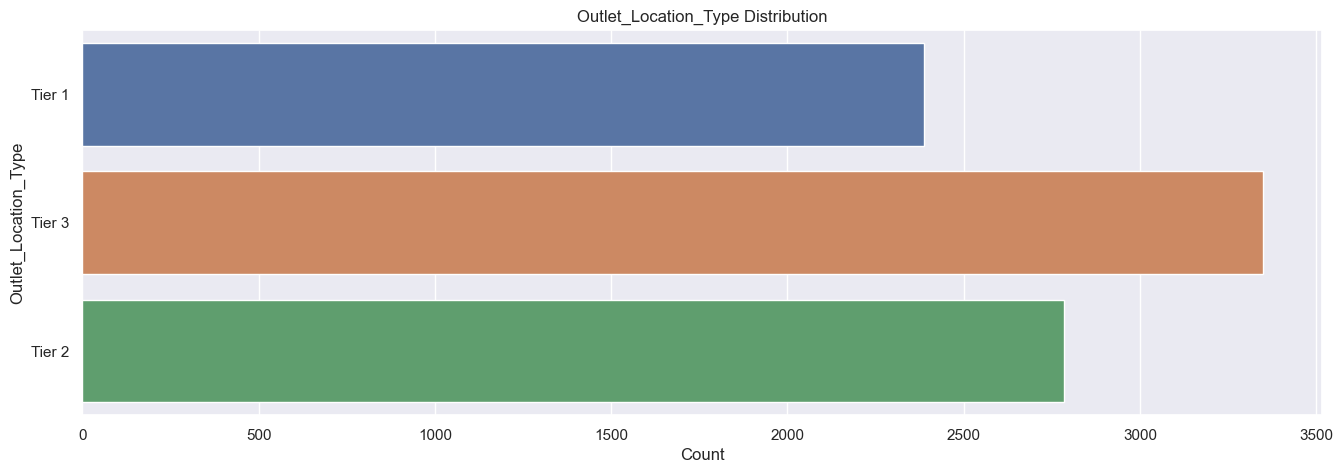

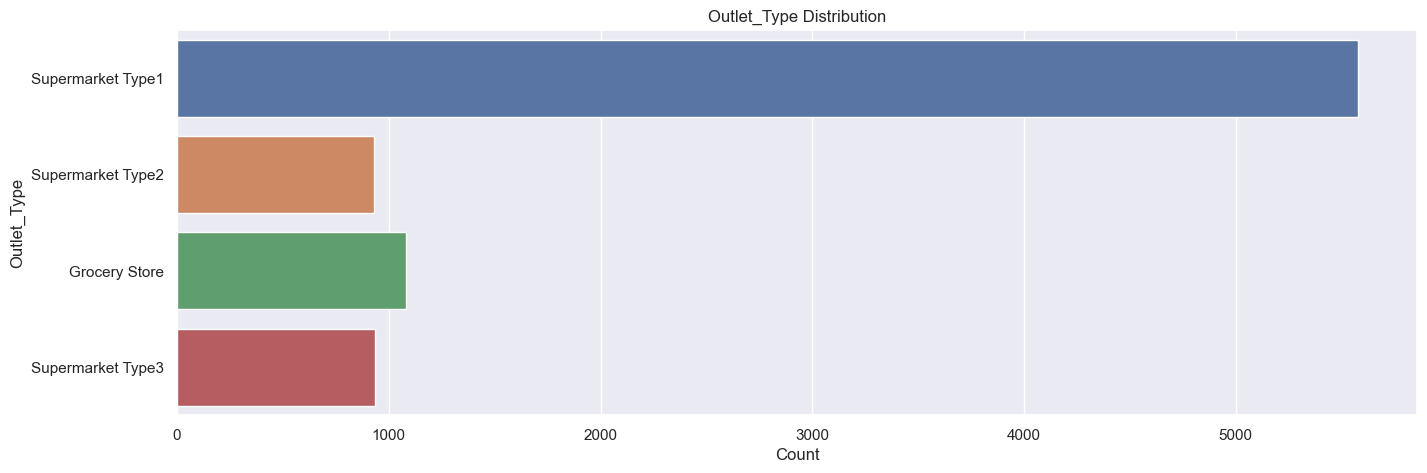

In [568]:
for col in str_cols:
    plt.figure(figsize=(16, 5))
    sns.countplot(y=col, data=train_df,orient="h")
    plt.title(f"{col} Distribution")  # Set the title of the plot
    plt.xlabel("Count")  # Set the label for the x-axis
    plt.ylabel(col)
    plt.show()

## Bivariate Analysis

In [569]:
cm = sns.light_palette("green", as_cmap=True)

train_df.corr(numeric_only=True).style.background_gradient(cmap=cm).set_precision(2)

C:\Users\Yasmeen Nour\AppData\Local\Temp\ipykernel_1224\2783759827.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  train_df.corr(numeric_only=True).style.background_gradient(cmap=cm).set_precision(2)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.03,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.03,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


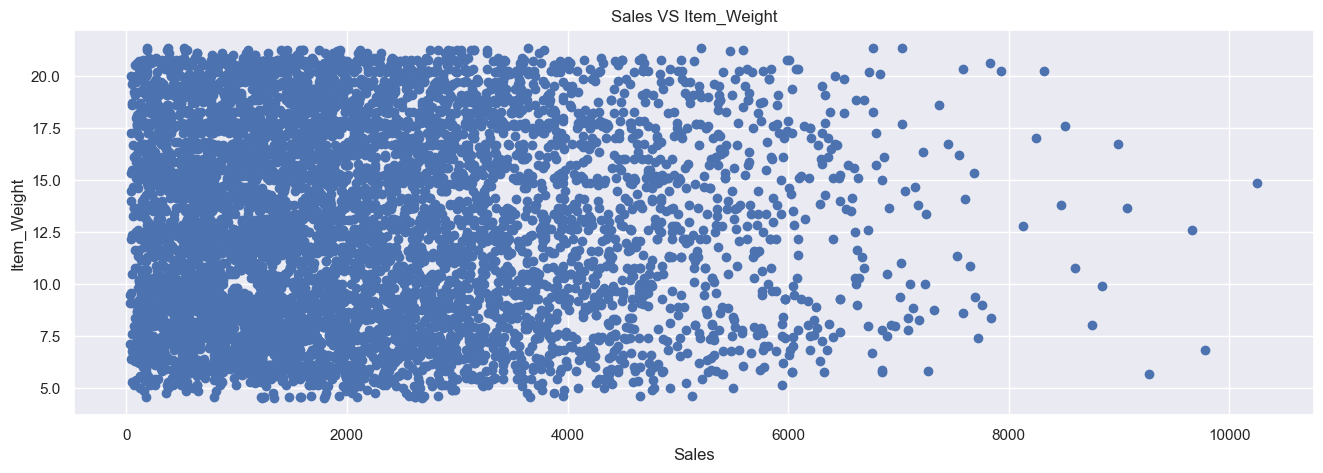

_______________________________________________________________________________________________________________________


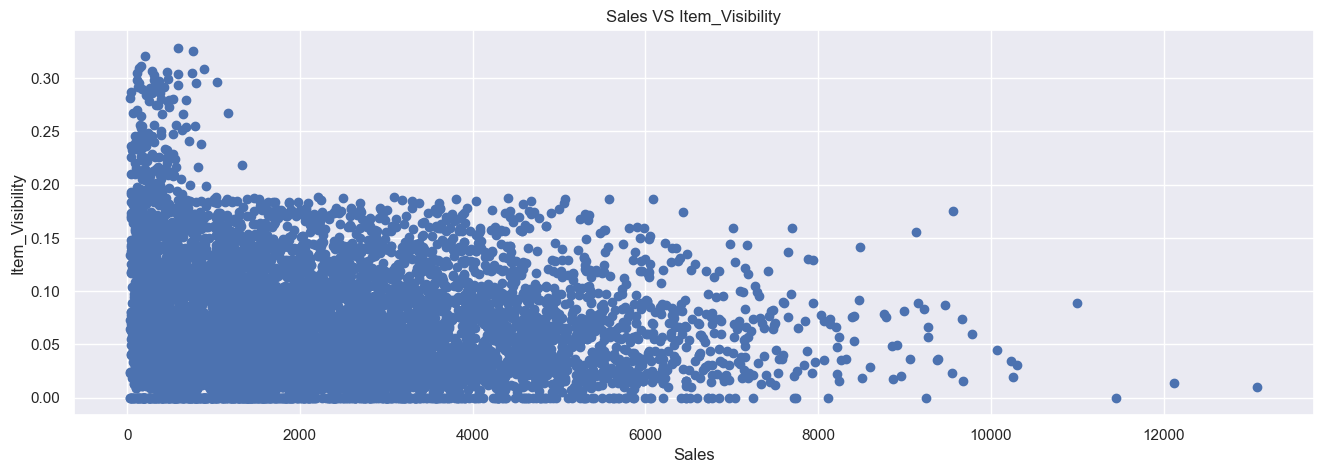

_______________________________________________________________________________________________________________________


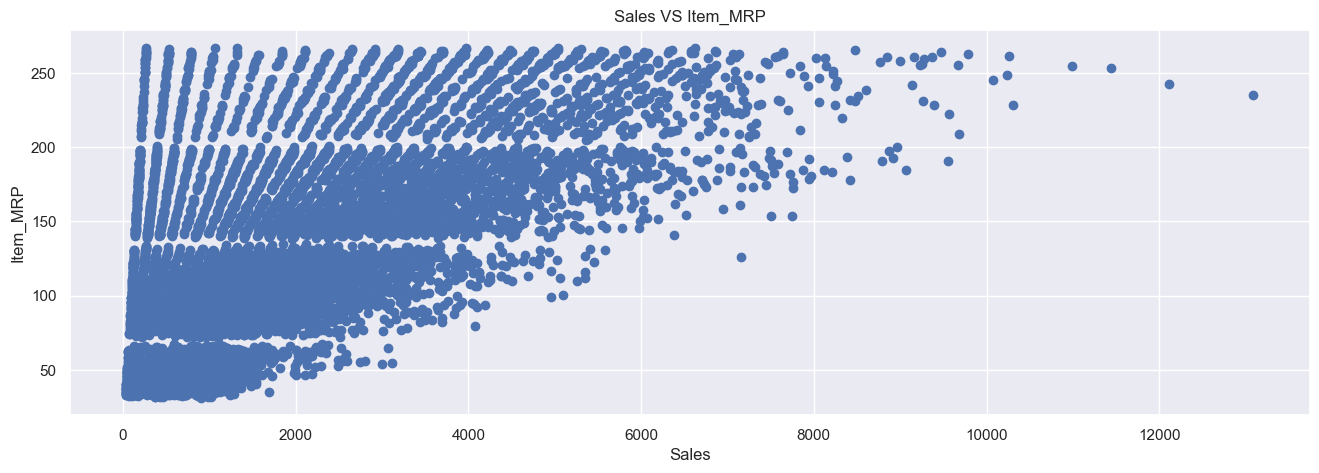

_______________________________________________________________________________________________________________________


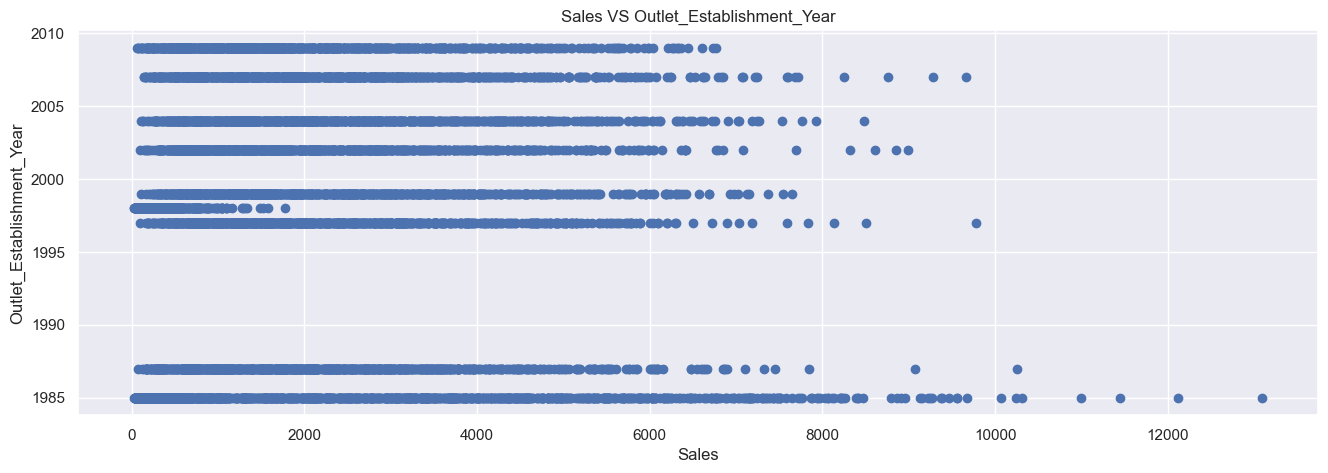

_______________________________________________________________________________________________________________________


In [570]:
for col in num_cols:
    plt.figure(figsize=(16, 5))
    plt.scatter(x=train_df["Item_Outlet_Sales"],y=train_df[col])
    plt.xlabel("Sales")
    plt.ylabel(col)
    plt.title(f"Sales VS {col}")
    plt.show()
    print("_______________________________________________________________________________________________________________________")

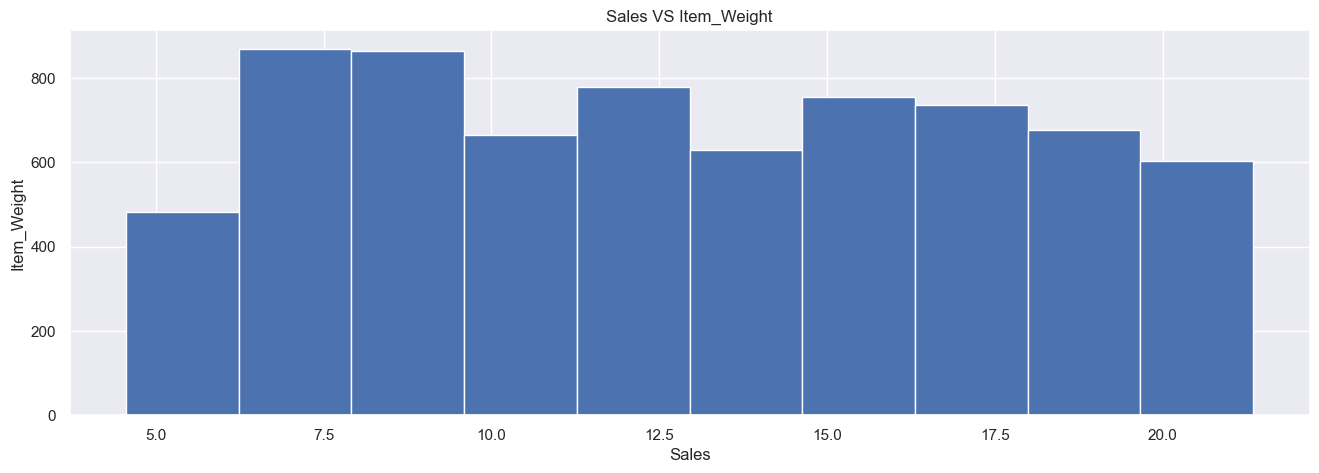

_______________________________________________________________________________________________________________________


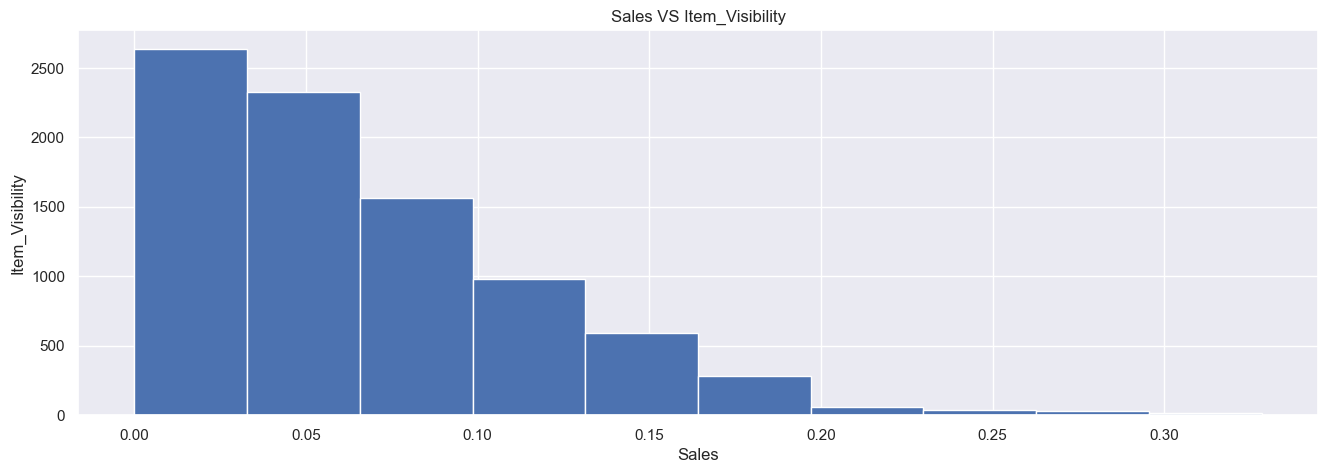

_______________________________________________________________________________________________________________________


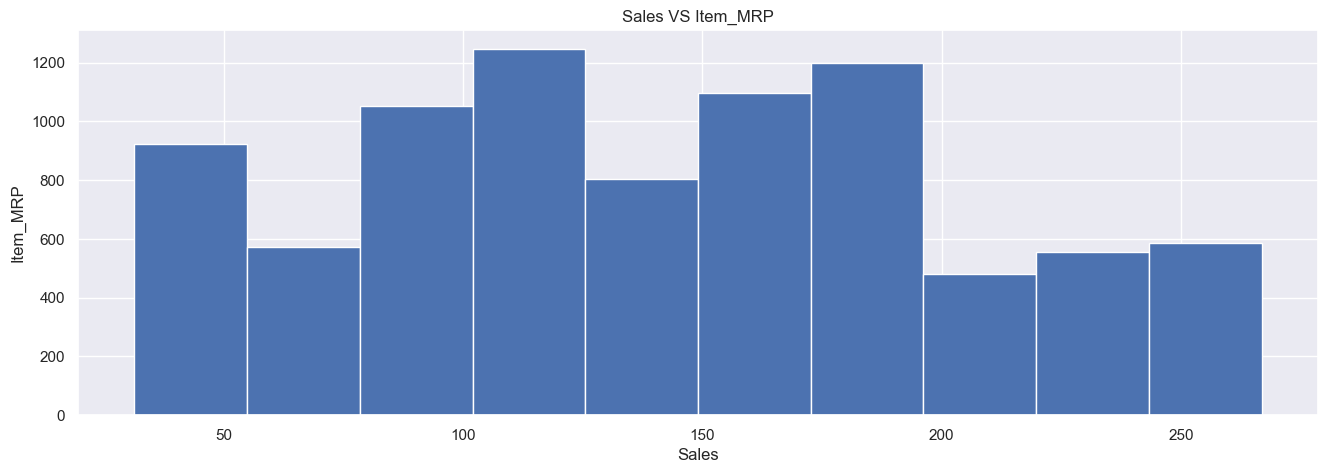

_______________________________________________________________________________________________________________________


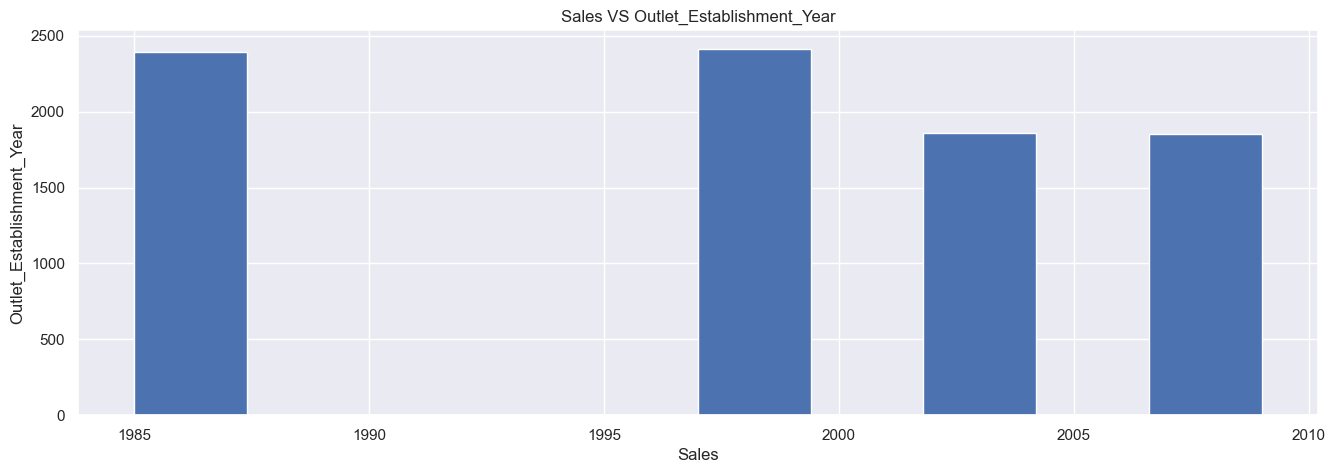

_______________________________________________________________________________________________________________________


In [571]:
for col in num_cols:
    plt.figure(figsize=(16, 5))
    train_df[col].hist()
    plt.xlabel("Sales")
    plt.ylabel(col)
    plt.title(f"Sales VS {col}")
    plt.show()
    print("_______________________________________________________________________________________________________________________")

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

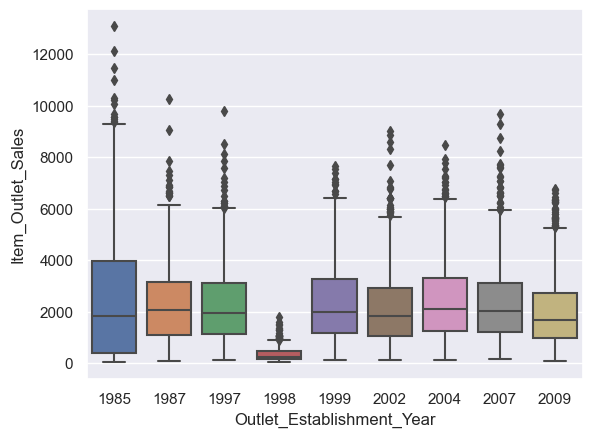

In [572]:
sns.boxplot(data=train_df, x='Outlet_Establishment_Year', y='Item_Outlet_Sales')

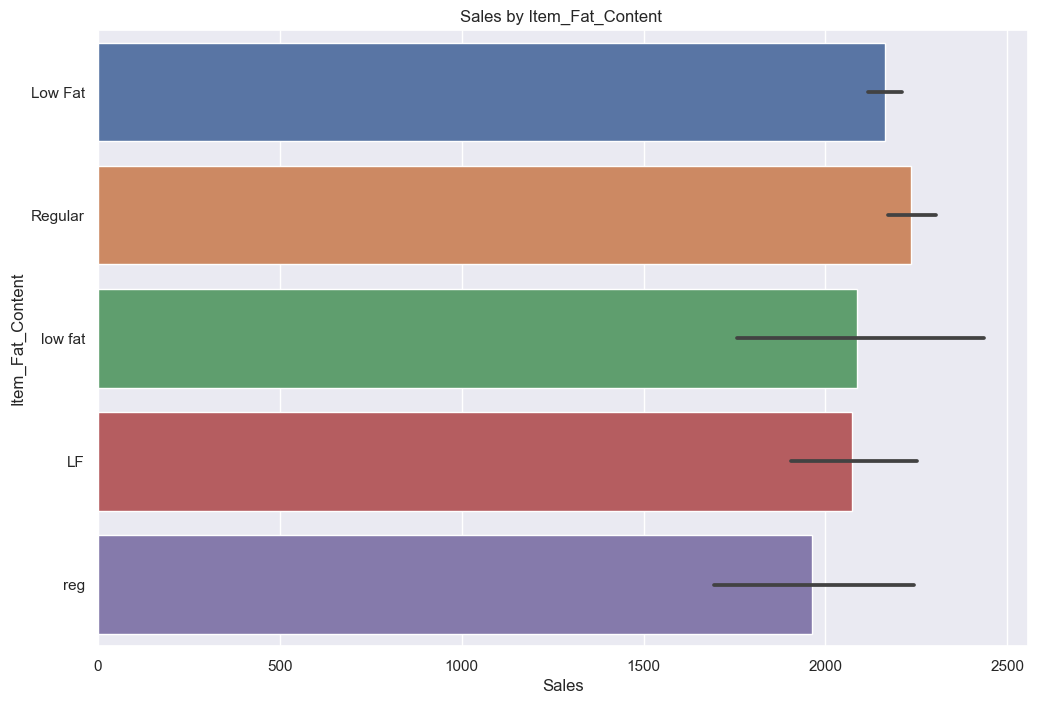

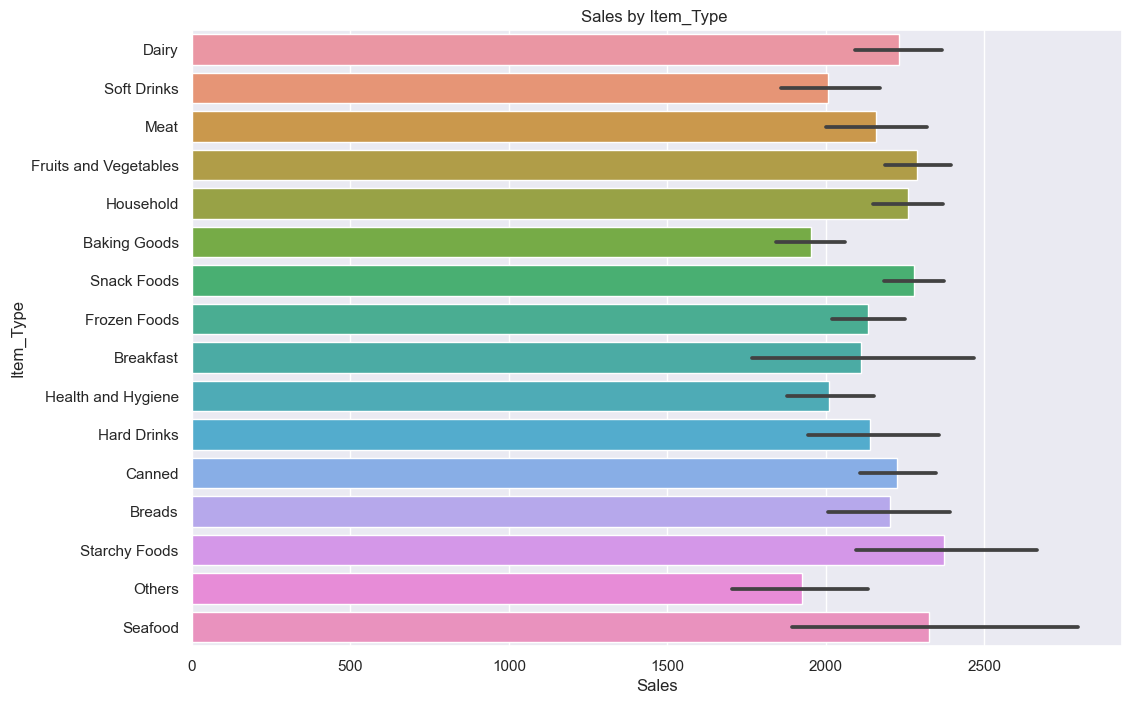

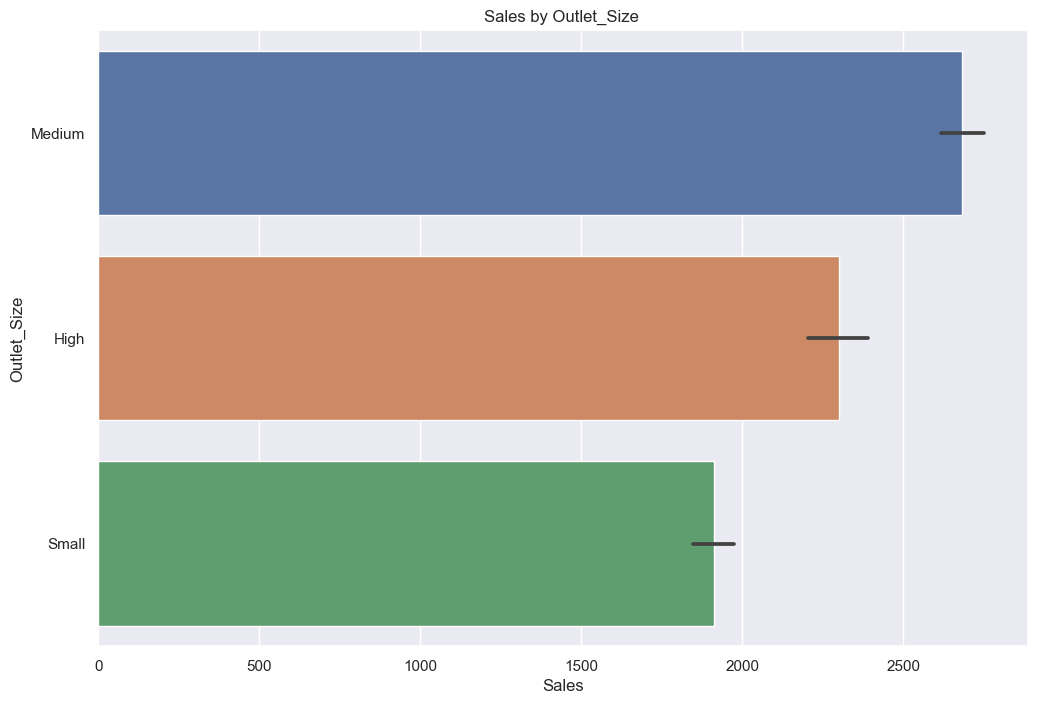

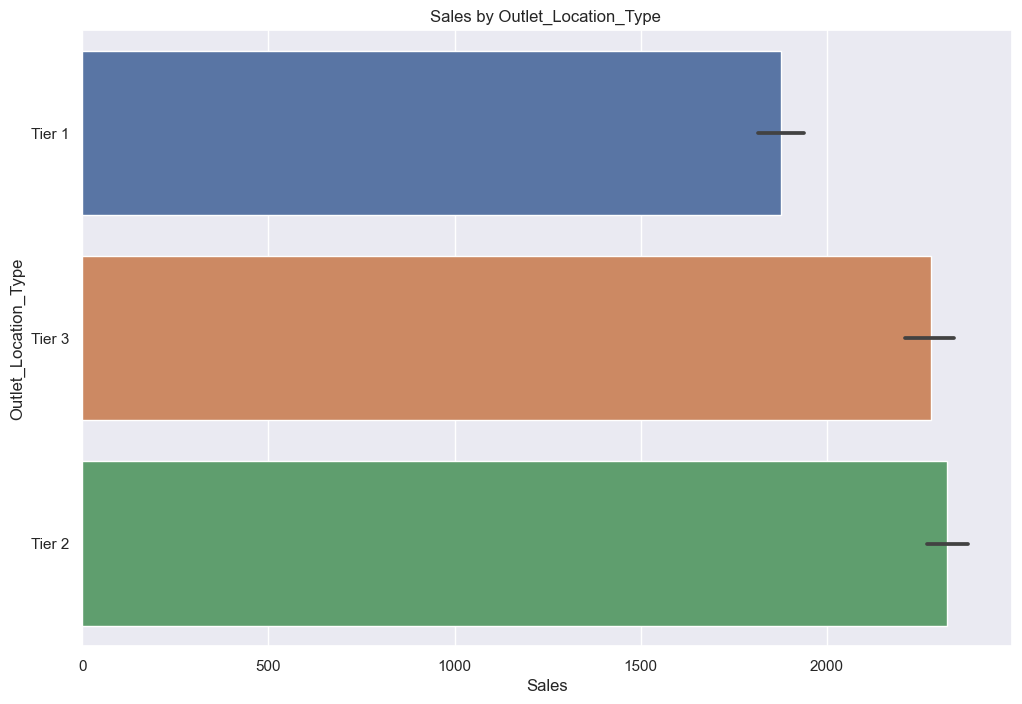

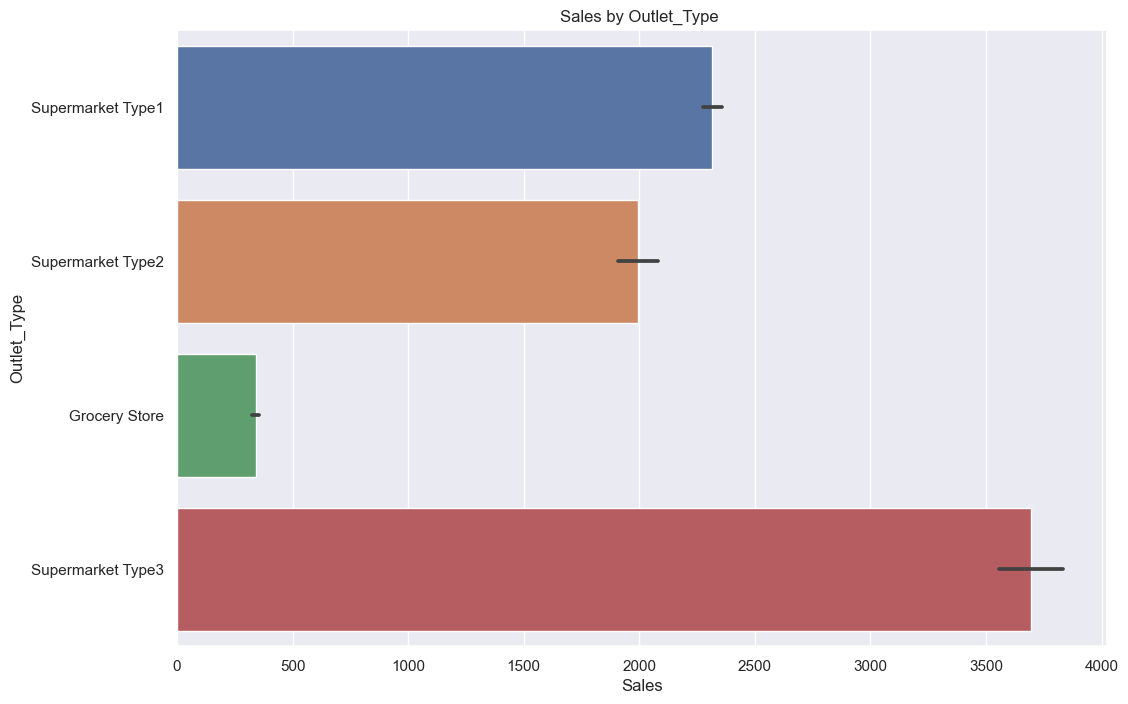

In [573]:
for col in str_cols:
    plt.figure(figsize=(12, 8))  # Set the figure size

    sns.barplot(x="Item_Outlet_Sales", y=col, data=train_df,orient="h")  # Create the bar chart

    plt.title(f"Sales by {col} ")  # Set the title of the plot
    plt.xlabel("Sales")  # Set the label for the x-axis
    plt.ylabel(col)  # Set the label for the y-axis

    plt.show()  # Display the plot

## Split data to have train and validation sets  

In [574]:
target="Item_Outlet_Sales"

X=train_df.drop(columns=target)
y=train_df[target]

X_train,X_val,y_train,y_val=train_test_split(X,y,random_state=42,shuffle=True,test_size=0.2)

## Missing Value Treatment

In [575]:
X_train.isna().sum()

Item_Identifier                 0
Item_Weight                  1174
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1935
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [578]:
# #check th avg of each item type and impute based on it ? knn imputation
# #check the median/mode for the outlet imputation based on the location
# #scalling the data

# imputer = KNNImputer(n_neighbors=3)
# X_train[num_cols] = imputer.fit_transform(X_train[num_cols])


# simple_imputer=SimpleImputer(strategy='most_frequent')

# # Fit the SimpleImputer object to the categorical column.


# X_train[str_cols]=simple_imputer.fit_transform(X_train[str_cols])



In [579]:
#alternative method :
X_train['Item_Weight'] = X_train.groupby('Item_Type')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

#for categorical
X_train["Outlet_Size"] = X_train.groupby("Outlet_Location_Type")["Outlet_Size"].transform(lambda x: x.fillna(x.mode()[0]))

In [580]:
X_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,6818.000000,6818.000000,6818.000000,6818.000000
mean,12.896464,0.066097,141.905134,1997.856850
std,4.377991,0.051429,62.547789,8.395692
min,4.555000,0.000000,31.290000,1985.000000
25%,9.195000,0.026939,94.175200,1987.000000
50%,12.711667,0.054129,144.262800,1999.000000
75%,16.350000,0.094791,186.855600,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [581]:
X_train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [638]:
X_train[['Outlet_Type', 'Outlet_Location_Type', 'Outlet_Size']].value_counts(dropna=False).to_frame().sort_index()

0
Outlet_Type       Outlet_Location_Type Outlet_Size      
Grocery Store     Tier 1               Small         413
                  Tier 3               Medium        446
Supermarket Type1 Tier 1               Medium        720
                                       Small         743
                  Tier 2               Small        2239
                  Tier 3               High          744
Supermarket Type2 Tier 3               Medium        752
Supermarket Type3 Tier 3               Medium        761

## Feature Engineering

In [537]:
#check grouping and other possible solutions

# calculate Outlet Age
current_year = 2023
X_train['Outlet_Age'] = current_year - X_train['Outlet_Establishment_Year']
X_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
549,FDW44,9.500,Regular,0.035206,Fruits and Vegetables,171.3448,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,24.0
7757,NCF54,18.000,Low Fat,0.047473,Household,170.5422,OUT045,2002.0,Medium,Tier 2,Supermarket Type1,21.0
764,FDY03,17.600,Regular,0.076122,Meat,111.7202,OUT046,1997.0,Small,Tier 1,Supermarket Type1,26.0
6867,FDQ20,8.325,Low Fat,0.029845,Fruits and Vegetables,41.6138,OUT045,2002.0,Medium,Tier 2,Supermarket Type1,21.0
2716,FDP34,12.850,Low Fat,0.137228,Snack Foods,155.5630,OUT046,1997.0,Small,Tier 1,Supermarket Type1,26.0


## Encoding Categorical Variables

In [244]:
ordinal_cols=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']
nominal_cols=[col for col in str_cols if not col in ordina_cols ]

## ordinal Encoding

In [245]:
oe=OrdinalEncoder()
X_train[ordinal_cols]=oe.fit_transform(X_train[ordinal_cols])

In [246]:
nominal_cols

['Item_Type', 'Outlet_Type']

## One Hot Encoding

In [247]:
X_train[nominal_cols].nunique()

Item_Type      16
Outlet_Type     4
dtype: int64

In [248]:
ohe=OneHotEncoder(sparse_output= False)
results=ohe.fit(X_train[nominal_cols])

In [249]:
one_hot_encoded_feature_names = ohe.get_feature_names_out()
rr=ohe.transform(X_train[nominal_cols])

In [251]:

# Add the one-hot encoded categorical columns to the original DataFrame.
for i in range(rr.shape[1]):
    X_train[one_hot_encoded_feature_names[i]] = rr[:, i]

In [252]:
X_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
549,FDW44,9.500,2.0,0.035206,Fruits and Vegetables,171.3448,OUT049,1999.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7757,NCF54,18.000,1.0,0.047473,Household,170.5422,OUT045,2002.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
764,FDY03,17.600,2.0,0.076122,Meat,111.7202,OUT046,1997.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6867,FDQ20,8.325,1.0,0.029845,Fruits and Vegetables,41.6138,OUT045,2002.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2716,FDP34,12.850,1.0,0.137228,Snack Foods,155.5630,OUT046,1997.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## PreProcessing Data

In [501]:
#create columntransformer and the pipeline
#drop nominal columns, ids 
#the column transformer will work in the functuion after the imputation , the encoding will be in the column transformer and the pipeline

def preprocess_data(data,numeric=num_cols,ordinal=ordinal_cols,nominal=nominal_cols):
    #impute data
    #numerical
    data['Item_Weight'] = data.groupby('Item_Type')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

    #for categorical
    data["Outlet_Size"] = data.groupby("Outlet_Location_Type")["Outlet_Size"].transform(lambda x: x.fillna(x.mode()[0]))
    
    #feature engineering
    current_year = 2023
    data['Outlet_Age'] = current_year - data['Outlet_Establishment_Year']
    
    cols_to_drop=['Outlet_Identifier','Item_Identifier']
    data=data.drop(columns=cols_to_drop)
   
    #create columnTransformer
    # define the data preparation for the columns
    t = [('ohe', OneHotEncoder(sparse_output= False), nominal), ('ore', OneHotEncoder(), ordinal),('num', StandardScaler(), numeric)]
    col_transform = ColumnTransformer(transformers=t,remainder='passthrough')
    
    return col_transform,data
    
    
    

In [582]:
col_transformer,X_train_preprocessed=preprocess_data(X_train)
col_transformer,X_val_preprocessed=preprocess_data(X_val)
col_transformer,X_preprocessed=preprocess_data(train_df)



## Modeling

In [601]:
def fit_evaluate(model_name,pipeline,X_train=X_train_preprocessed,y_train=y_train,X_preprocessed=X_preprocessed,y=y,X_val=X_val,y_val=y_val):
    pipeline.fit(X_train_preprocessed, y_train)
    print(f"{model_name}'s accuracy :{pipeline.score(X_train_preprocessed,y_train)}")
    
    yhat=pipeline.predict(X_val)
    print(f"{model_name}'s r2_score :{r2_score(y_val,yhat)}")
    
    rmse=np.sqrt(mean_squared_error(y_val,yhat))
    print(f"{model_name}'s RMSE :{rmse}")
    
    scores=cross_val_score(pipeline,X_preprocessed,y,scoring="neg_mean_squared_error",cv=5,n_jobs=-1,verbose=1)
    print(f"{model_name}'s CV SCORES AVG [mean_squared error] :{ np.sqrt(-1*(scores.mean()))}")
    

### Linear Regression

In [602]:
# define the data preparation and modeling pipeline
lr_model=LinearRegression()
lr_pipeline = Pipeline(steps=[('prep',col_transformer), ('lr', lr_model)])


Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['Item_Type', 'Outlet_Type']),
                                                 ('ore', OneHotEncoder(),
                                                  ['Item_Fat_Content',
                                                   'Outlet_Size',
                                                   'Outlet_Location_Type']),
                                                 ('num', StandardScaler(),
                                                  ['Item_Weight',
                                                   'Item_Visibility',
                                                   'Item_MRP',
                                                   'Outlet_Establishment_Year'])])),
                ('lr', LinearRegression())])

In [603]:
fit_evaluate("linear regression",lr_pipeline)

linear regression's accuracy :0.559116536556143
linear regression's r2_score :0.5784080587133751
linear regression's RMSE :1070.4551726923837


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


linear regression's CV SCORES AVG [mean_squared error] :6.987343899643639e-12


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


### Regularized Linear Regression

In [604]:
# define the data preparation and modeling pipeline
model=Ridge(alpha=0.1)
pipeline = Pipeline(steps=[('prep',col_transformer), ('ridge', model)])

fit_evaluate("Ridge",pipeline)

Ridge's accuracy :0.5591164343232871
Ridge's r2_score :0.5783942544624449
Ridge's RMSE :1070.472697589575


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Ridge's CV SCORES AVG [mean_squared error] :1.3082372764213137e-08


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished


linear regression using groupby imputation 
1070.5012756372153

ridge : 1070.4995198533165

### RandomForest

In [606]:
# define the data preparation and modeling pipeline
rf_model=RandomForestRegressor(random_state=42)
rf_pipeline = Pipeline(steps=[('preprocess',col_transformer), ('model', rf_model)])

fit_evaluate("RandomForest",rf_pipeline)


RandomForest's accuracy :0.9369566743000449
RandomForest's r2_score :0.5642969373552733
RandomForest's RMSE :1088.222349615003


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


RandomForest's CV SCORES AVG [mean_squared error] :21.145426177608382


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.2s finished


#### Hyperparameter Tunning

In [609]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = [1.0, 'sqrt','log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

max_leaf_nodes=[3, 6, 9,12,15,18,21,24,27,30,33,36]

# Create the random grid
random_grid = {'model__n_estimators': n_estimators,
               'model__max_features': max_features,
               'model__max_depth': max_depth,
               'model__min_samples_split': min_samples_split,
               'model__min_samples_leaf': min_samples_leaf,
               'model__bootstrap': bootstrap,
               'model__max_leaf_nodes': max_leaf_nodes}

In [611]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf_pipeline,
                               param_distributions = random_grid,
                               n_iter = 100, cv = 5, verbose=2,
                               random_state=42, n_jobs = -1,scoring="neg_mean_squared_error")
# Fit the random search model
rf_random.fit(X_train_preprocessed, y_train)
best_model=rf_random.best_estimator_
fit_evaluate("tunned RandomForest",best_model)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
tunned RandomForest's accuracy :0.6362051032647806
tunned RandomForest's r2_score :0.6092242604866384
tunned RandomForest's RMSE :1030.5904922700047


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


tunned RandomForest's CV SCORES AVG [mean_squared error] :39.79126104045467


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.3min finished


In [640]:
params={'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_leaf_nodes': 21,
 'max_features': 1.0,
 'max_depth': 80,
 'bootstrap': True}

In [643]:
rf_tunned=RandomForestRegressor(n_estimators=params["n_estimators"],min_samples_split=params["min_samples_split"],
                                min_samples_leaf=params["min_samples_leaf"],
                                max_leaf_nodes=params["max_leaf_nodes"],max_features=params["max_features"],
                                max_depth=params["max_depth"],bootstrap=params["bootstrap"],random_state=42)

rf_pipeline = Pipeline(steps=[('preprocess',col_transformer), ('model', rf_tunned)])

fit_evaluate("RandomForest Tunned",rf_pipeline)

RandomForest Tunned's accuracy :0.6159170250562418
RandomForest Tunned's r2_score :0.6126728725011352
RandomForest Tunned's RMSE :1026.0329129860081


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


RandomForest Tunned's CV SCORES AVG [mean_squared error] :78.99335916434552


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.0min finished


### XGBoost

In [413]:
# define the data preparation and modeling pipeline
xgb_model=xgb.XGBRegressor(random_state=42)
xgb_pipeline = Pipeline(steps=[('prep',col_transformer), ('xgb', xgb_model)])

fit_evaluate("XGBoost",xgb_pipeline)

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['Item_Type', 'Outlet_Type']),
                                                 ('ore', OneHotEncoder(),
                                                  ['Item_Fat_Content',
                                                   'Outlet_Size',
                                                   'Outlet_Location_Type']),
                                                 ('num', RobustScaler(),
                                                  ['Item_Weight',
                                                   'Item_Visibility',
                                                   'Item_MRP',
                                                   'Outlet_Establishment_Year'])])),
                ('xgb',
                 XGBRegresso...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [614]:
fit_evaluate("XGBoost",xgb_pipeline)

XGBoost's accuracy :0.8512119078896934
XGBoost's r2_score :0.5364440776608512
XGBoost's RMSE :1122.466534521503


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


XGBoost's CV SCORES AVG [mean_squared error] :24.416594855376385


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.7s finished


### Hyperparameter Tunning

In [476]:
# Create the random grid
random_grid = {  "xgb__learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
                 "xgb__max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
                 "xgb__min_child_weight" : [ 1, 3, 5, 7 ],
                 "xgb__gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
                 "xgb__colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

In [419]:
xgb_random = RandomizedSearchCV(estimator = xgb_pipeline,
                               param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=2,
                               random_state=42, n_jobs = -1,scoring="neg_mean_squared_error")
# Fit the random search model
xgb_random.fit(X_train_preprocessed, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               OneHotEncoder(sparse_output=False),
                                                                               ['Item_Type',
                                                                                'Outlet_Type']),
                                                                              ('ore',
                                                                               OneHotEncoder(),
                                                                               ['Item_Fat_Content',
                                                                                'Outlet_Size',
                                                                                'Outlet_Location_Type']),
                                                                              ('num',
                                                                               RobustScaler(),
                                                                               ['Item_Weight',
                                                                                'Item_Visibility',
                                                                                'Item_MRP',
                                                                                'Outlet_Establish...
                                                           num_parallel_tree=None,
                                                           predictor=None,
                                                           random_state=None, ...))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'xgb__colsample_bytree': [0.3, 0.4, 0.5,
                                                                  0.7],
                                        'xgb__gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'xgb__learning_rate': [0.05, 0.1, 0.15,
                                                               0.2, 0.25, 0.3],
                                        'xgb__max_depth': [3, 4, 5, 6, 8, 10,
                                                           12, 15],
                                        'xgb__min_child_weight': [1, 3, 5, 7]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [613]:
best_model=xgb_random.best_estimator_
fit_evaluate("tunned XGBoost",best_model)

tunned XGBoost's accuracy :0.6362051032647806
tunned XGBoost's r2_score :0.6092242604866384
tunned XGBoost's RMSE :1030.5904922700047


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


tunned XGBoost's CV SCORES AVG [mean_squared error] :39.79126104045467


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.3min finished


### GradientboostRegressors

In [616]:
gbm = GradientBoostingRegressor(random_state=42)
gbm_pipeline = Pipeline(steps=[('prep',col_transformer), ('gbm', gbm)])

fit_evaluate("Gradientboost",gbm_pipeline)

Gradientboost's accuracy :0.6340224756491495
Gradientboost's r2_score :0.6029373266700808
Gradientboost's RMSE :1038.8476599971405


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Gradientboost's CV SCORES AVG [mean_squared error] :21.413797132194116


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.2s finished


### Hyperparameter Tunning

In [627]:
# # Create the random grid

# param_grid = {
#     'gbm__loss': ['ls', 'lad', 'huber', 'quantile'],
#     'gbm__learning_rate': [0.05, 0.1, 0.2, 0.3, 0.5],
#     'gbm__n_estimators': randint(100, 1000),
#     'gbm__subsample': uniform(0.6, 0.4),
#     'gbm__criterion': ['friedman_mse', 'mse', 'mae'],
#     'gbm__min_samples_split': randint(2, 10),
#     'gbm__min_samples_leaf': randint(1, 5),
#     'gbm__max_depth': randint(3, 10),
#     'gbm__max_features': ['auto', 'sqrt', 'log2'],
#     'gbm__alpha': uniform(0, 1),
#     'gbm__max_leaf_nodes': randint(10, 50),
#     'gbm__min_impurity_decrease': uniform(0, 0.2),
#     'gbm__min_weight_fraction_leaf': uniform(0, 0.5),
    
# }

# gbm_random = RandomizedSearchCV(estimator = gbm_pipeline,
#                                param_distributions = param_grid,
#                                n_iter = 100, cv = 3, verbose=2,
#                                random_state=42, n_jobs = -1,scoring="neg_mean_squared_error")
# # Fit the random search model
# gbm_random.fit(X_train_preprocessed, y_train)
# best_model=gbm_random.best_estimator_

## Save Models

In [526]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [631]:
test_preprocessed=preprocess_data(test_df)

In [644]:
#save final best  model
#the final model is rf with lowest RMSE

y_pred=rf_pipeline.predict(test_df)
test_df["Outlet_sales"]=y_pred

#save the lowest RMSE model
joblib.dump(rf_pipeline, 'rf_model.pkl')

# Save the pipeline to a .pkl file
joblib.dump(best_model, 'xgboost_model.pkl')


['xgboost_model.pkl']

In [637]:
test_df.to_csv("C:/Users/Yasmeen Nour/Desktop/technocolabs/mini project/final_prediction.csv")

### Summary

Linear regression and Ridge models scores are not efficient because the relation in the data are non linear 
the rf and xgb are better performers but the error score is still high but they perform better in r2 scores than the linear models 
The data regarding the outlet location type might have helped better in feature engineering if it was less amigous whic might have improved the model's accuracy
